## Organizing Images using CNN

In [1]:
import pandas as pd #for dataframe operations
import numpy as np #for numerical operations
import matplotlib.pyplot as plt #plotting graphs
%matplotlib inline
import tensorflow as tf #CNN operations
import os #fetch data from directory
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

Using TensorFlow backend.


In [2]:
# labelling the categories
class_names = ['category 1', 'category 2', 'category 3', 'category 4']
class_names_label = {label:i for i, label in enumerate(class_names)}

In [3]:
# check labelled categories
print(class_names_label)

{'category 1': 0, 'category 2': 1, 'category 3': 2, 'category 4': 3}


In [8]:
from tqdm import tqdm
import cv2

def load_train_data():
    dataset = 'F:/DS/CNN_assignment-20200702T094027Z-001/CNN_assignment/Dataset/train'
    images = []
    labels = []
    print('Loading {}'.format(dataset))
    
    for folder in os.listdir(dataset):
        label = class_names_label[folder]
        
        for file in tqdm(os.listdir(os.path.join(dataset, folder))):
            img_path = os.path.join(os.path.join(dataset, folder), file)
            image = cv2.imread(img_path)
            image = cv2.resize(image, (150, 150))
            images.append(image)
            labels.append(label)
    
    images = np.array(images, dtype = 'float32')
    labels = np.array(labels, dtype = 'int32')
    
    return(images, labels)

In [49]:
def load_test_data():
    dataset = 'F:/DS/CNN_assignment-20200702T094027Z-001/CNN_assignment/Dataset/test'
    images = []
    image_id = []
    print('loading {}', format(dataset))
    
    for file in tqdm(os.listdir(dataset)):
        img_path = os.path.join(dataset, file)
        image = cv2.imread(img_path)
        image = cv2.resize(image, (150, 150))
        images.append(image)
        image_id.append(file)
        
    images = np.array(images, dtype = 'float32')
    
    return (image_id, images)

In [10]:
train_images, train_labels = load_train_data()

Loading F:/DS/CNN_assignment-20200702T094027Z-001/CNN_assignment/Dataset/train


100%|████████████████████████████████████████████████████████████████████████████████| 119/119 [00:01<00:00, 66.30it/s]


In [11]:
print(train_images.shape)
print(train_labels.shape)

(440, 150, 150, 3)
(440,)


In [13]:
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


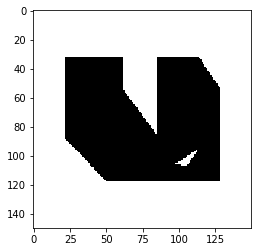

1


In [22]:
plt.imshow(train_images[100])
plt.show()
print(train_labels[100]+1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


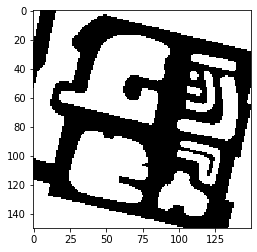

2


In [18]:
plt.imshow(train_images[200])
plt.show()
print(train_labels[200]+1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


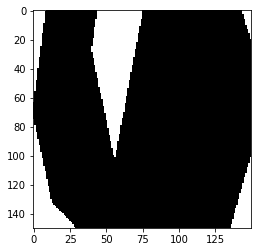

1


In [19]:
plt.imshow(train_images[1])
plt.show()
print(train_labels[1]+1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


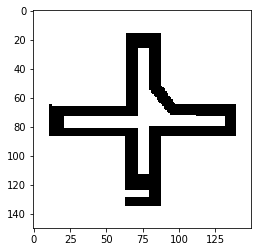

4


In [20]:
plt.imshow(train_images[400])
plt.show()
print(train_labels[400]+1)

In [29]:
# Building CNN Model
from keras import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D, AvgPool2D
from keras.activations import relu, softmax

In [45]:
model = Sequential([
    Conv2D(64, (7,7), padding='SAME', activation='relu', input_shape=(150, 150, 3)),
    AvgPool2D(),
    Flatten(),
    Dense(128, activation=relu),
    Dropout(0.4),
    Dense(4, activation=softmax)
])

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_images, train_labels, batch_size=32, epochs=25)

Epoch 1/25
440/440 [==============================] - ETA: 1:15 - loss: 85.2913 - accuracy: 0.312 - ETA: 45s - loss: 6206.2824 - accuracy: 0.26 - ETA: 33s - loss: 7629.5453 - accuracy: 0.27 - ETA: 26s - loss: 6710.6277 - accuracy: 0.29 - ETA: 22s - loss: 5492.9623 - accuracy: 0.33 - ETA: 18s - loss: 4691.1130 - accuracy: 0.31 - ETA: 15s - loss: 4066.6032 - accuracy: 0.31 - ETA: 12s - loss: 3585.0201 - accuracy: 0.31 - ETA: 10s - loss: 3199.3475 - accuracy: 0.30 - ETA: 7s - loss: 2885.5699 - accuracy: 0.3031 - ETA: 5s - loss: 2628.0795 - accuracy: 0.304 - ETA: 3s - loss: 2412.1470 - accuracy: 0.307 - ETA: 1s - loss: 2229.2321 - accuracy: 0.312 - 28s 63ms/step - loss: 2109.5160 - accuracy: 0.3136
Epoch 2/25
440/440 [==============================] - ETA: 24s - loss: 32.4054 - accuracy: 0.37 - ETA: 25s - loss: 27.2556 - accuracy: 0.45 - ETA: 24s - loss: 23.5055 - accuracy: 0.46 - ETA: 20s - loss: 20.8015 - accuracy: 0.47 - ETA: 18s - loss: 20.6155 - accuracy: 0.48 - ETA: 16s - loss: 18.47

440/440 [==============================] - ETA: 21s - loss: 1.3692e-04 - accuracy: 1.000 - ETA: 19s - loss: 0.0286 - accuracy: 0.9844    - ETA: 17s - loss: 0.0383 - accuracy: 0.979 - ETA: 16s - loss: 0.0333 - accuracy: 0.984 - ETA: 14s - loss: 0.0421 - accuracy: 0.981 - ETA: 12s - loss: 0.0436 - accuracy: 0.979 - ETA: 11s - loss: 0.0548 - accuracy: 0.977 - ETA: 9s - loss: 0.0480 - accuracy: 0.980 - ETA: 7s - loss: 0.0679 - accuracy: 0.97 - ETA: 6s - loss: 0.0615 - accuracy: 0.97 - ETA: 4s - loss: 0.0559 - accuracy: 0.98 - ETA: 2s - loss: 0.0582 - accuracy: 0.97 - ETA: 1s - loss: 0.0538 - accuracy: 0.97 - 23s 53ms/step - loss: 0.0512 - accuracy: 0.9795
Epoch 14/25
440/440 [==============================] - ETA: 21s - loss: 0.0383 - accuracy: 1.000 - ETA: 19s - loss: 0.0194 - accuracy: 1.000 - ETA: 18s - loss: 0.0378 - accuracy: 0.989 - ETA: 16s - loss: 0.0351 - accuracy: 0.984 - ETA: 15s - loss: 0.0319 - accuracy: 0.987 - ETA: 13s - loss: 0.0303 - accuracy: 0.984 - ETA: 11s - loss: 0.06

440/440 [==============================] - ETA: 20s - loss: 0.0070 - accuracy: 1.000 - ETA: 19s - loss: 0.0038 - accuracy: 1.000 - ETA: 18s - loss: 0.0149 - accuracy: 0.989 - ETA: 16s - loss: 0.0203 - accuracy: 0.984 - ETA: 14s - loss: 0.0379 - accuracy: 0.975 - ETA: 12s - loss: 0.0316 - accuracy: 0.979 - ETA: 11s - loss: 0.0274 - accuracy: 0.982 - ETA: 9s - loss: 0.0250 - accuracy: 0.984 - ETA: 7s - loss: 0.0225 - accuracy: 0.98 - ETA: 6s - loss: 0.0204 - accuracy: 0.98 - ETA: 4s - loss: 0.0236 - accuracy: 0.98 - ETA: 2s - loss: 0.0252 - accuracy: 0.98 - ETA: 1s - loss: 0.0248 - accuracy: 0.98 - 23s 53ms/step - loss: 0.0266 - accuracy: 0.9864


[0, 11, 0, 1]

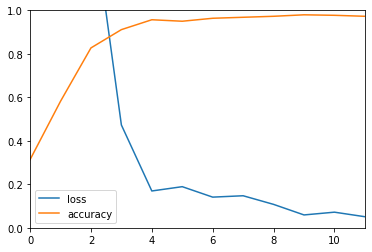

In [34]:
pd.DataFrame(history.history).plot()
plt.axis([0,11,0,1])

In [35]:
train_predictions = model.predict_classes(train_images, batch_size=44)

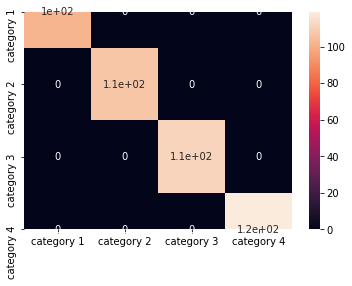

In [36]:
sns.heatmap(confusion_matrix(train_labels, train_predictions), annot=True, xticklabels=class_names, yticklabels=class_names)
plt.show()

In [37]:
print(confusion_matrix(train_labels, train_predictions))

[[102   0   0   0]
 [  0 107   0   0]
 [  0   0 112   0]
 [  0   0   0 119]]


predicted category: [3]
Actual category: 3


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


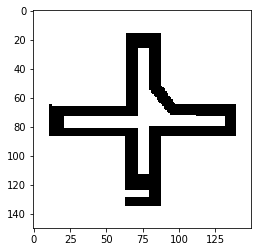

In [39]:
some_image = train_images[400]
some_image_label = train_labels[400]
print(f'predicted category: {model.predict_classes(some_image.reshape(1,150,150,3))}')
print(f"Actual category: {some_image_label}")
plt.imshow(some_image)
plt.show()

In [51]:
#Categorizing test data
test_image_id, test_images = load_test_data()

loading {} F:/DS/CNN_assignment-20200702T094027Z-001/CNN_assignment/Dataset/test


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 28.32it/s]


In [52]:
test_predictions = model.predict_classes(test_images, verbose=2)

In [58]:
results_df = pd.DataFrame({
    'Image_ID': test_image_id,
    'Predicted Labels': test_predictions
}).set_index('Image_ID')

In [59]:
results_df.head()

,Predicted Labels
Image_ID,
1051.png,3
1052.png,3
4043.png,3
4050.png,3
4051.png,3


In [60]:
def label2class(label):
    return 'category'+str(label+1)
results_df['Class'] = results_df['Predicted Labels'].apply(label2class)
results_df.drop('Predicted Labels', axis=1, inplace=True)

In [61]:
results_df.to_csv('F:/DS/CNN_assignment-20200702T094027Z-001/CNN_assignment/results.csv')

In [62]:
list(results_df.loc['1052.png'])[0]

'category4'